# Lesson 0028 - APPLE Time Series Prediction Recurrent Neural Network (III)
In this lesson, we revisit the APPLE stock. In the last [lesson](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0027_apple_time_series_prediction_recurrent_neural_network_2.ipynb), we achieved an improvement of the accuracy of the prediction of the APPLE stock price by raising the number of __LSTM__ cells.<br>
But since we raised this number to a relatively high value, we cannot keep on increasing this number. Therefore, we attempt to improve the accuracy of  our model by introducing external signals.<br>
In this lesson, we will extend the code from [lesson 0027](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0027_apple_time_series_prediction_recurrent_neural_network_2.ipynb) by also considering the stock prices of the other [FAANG](https://en.wikipedia.org/wiki/Facebook,_Apple,_Amazon,_Netflix_and_Google) stocks for the prediction of the APPLE stock price.<br>
Aside from the code to gather and manipulate these data, the code will be identical to the code from [lesson 0027](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0027_apple_time_series_prediction_recurrent_neural_network_2.ipynb).

In [1]:
import tensorflow as tf

tf.set_random_seed( 1234567890 )

print( tf.__version__ )

1.13.1


In [2]:
import numpy as np

np.random.seed( 1234567890 )

print( np.__version__ )

1.16.2


In [3]:
import matplotlib
import matplotlib.pyplot as plt

print( matplotlib.__version__ )

3.0.3


In [4]:
import yfinance as yf 

print( yf.__version__ )

0.1.43


In [5]:
import datetime as dt

In [6]:
end = dt.datetime.now().strftime('%Y-%m-%d')

start = dt.datetime.now().strftime('%Y-%m-%d')




start_year = start[ 0 : 4 ]

start_year = int( start_year )

start_year = start_year - 5

start_year = str( start_year )

start = start_year + start[ 4 : len( start ) ] 



data_apple = yf.download( 'AAPL', start, end )

[*********************100%***********************]  1 of 1 downloaded


C:\Users\rhopi\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Price ($)')

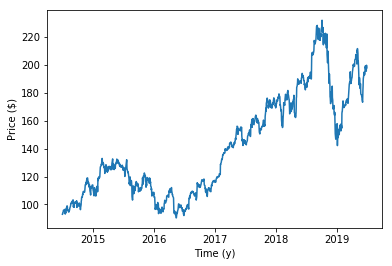

In [7]:
plt.plot( data_apple.Close )

plt.xlabel( 'Time (y)' )

plt.ylabel( 'Price ($)' )

Now, we also download the stock prices for __Amazon__, __Facebook__, __Google__ and __Netflix__.

In [8]:
data_amazon = yf.download( 'AMZN', start, end )

data_facebook = yf.download( 'FB', start, end )

data_google = yf.download( 'GOOGL', start, end )

data_netflix = yf.download( 'NFLX', start, end )

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


Text(0, 0.5, 'Price ($)')

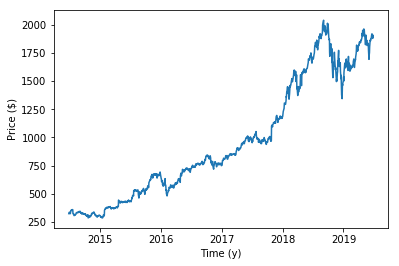

In [9]:
plt.plot( data_amazon.Close )

plt.xlabel( 'Time (y)' )

plt.ylabel( 'Price ($)' )

Text(0, 0.5, 'Price ($)')

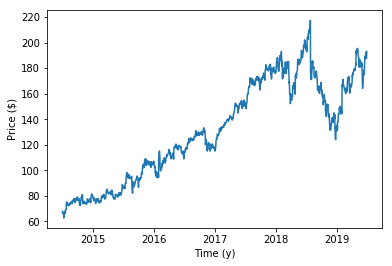

In [10]:
plt.plot( data_facebook.Close )

plt.xlabel( 'Time (y)' )

plt.ylabel( 'Price ($)' )

Text(0, 0.5, 'Price ($)')

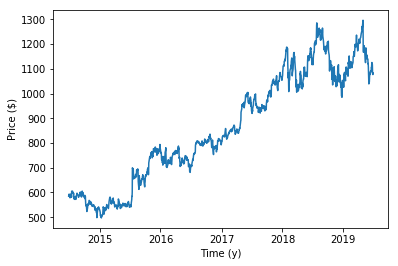

In [11]:
plt.plot( data_google.Close )

plt.xlabel( 'Time (y)' )

plt.ylabel( 'Price ($)' )

Text(0, 0.5, 'Price ($)')

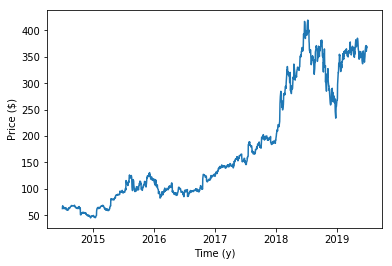

In [12]:
plt.plot( data_netflix.Close )

plt.xlabel( 'Time (y)' )

plt.ylabel( 'Price ($)' )

In [13]:
prices_apple = data_apple.Close.values

train_apple = prices_apple[ 0 : 1000 ]

test_apple = prices_apple[ 1000 : len( prices_apple ) ]




prices_amazon = data_amazon.Close.values

train_amazon = prices_amazon[ 0 : 1000 ]

test_amazon = prices_amazon[ 1000 : len( prices_amazon ) ]




prices_facebook = data_facebook.Close.values

train_facebook = prices_facebook[ 0 : 1000 ]

test_facebook = prices_facebook[ 1000 : len( prices_facebook ) ]




prices_google = data_google.Close.values

train_google = prices_google[ 0 : 1000 ]

test_google = prices_google[ 1000 : len( prices_google ) ]




prices_netflix = data_netflix.Close.values

train_netflix = prices_netflix[ 0 : 1000 ]

test_netflix = prices_netflix[ 1000 : len( prices_netflix ) ]

In [14]:
mu_apple = np.mean( train_apple )

sigma_apple = np.std( train_apple )


train_apple = ( train_apple - mu_apple ) / sigma_apple

test_apple = ( test_apple - mu_apple ) / sigma_apple





mu_amazon = np.mean( train_amazon )

sigma_amazon = np.std( train_amazon )


train_amazon = ( train_amazon - mu_amazon ) / sigma_amazon

test_amazon = ( test_amazon - mu_amazon ) / sigma_amazon





mu_facebook = np.mean( train_facebook )

sigma_facebook = np.std( train_facebook )


train_facebook = ( train_facebook - mu_facebook ) / sigma_facebook

test_facebook = ( test_facebook - mu_facebook ) / sigma_facebook





mu_google = np.mean( train_google )

sigma_google = np.std( train_google )


train_google = ( train_google - mu_google ) / sigma_google

test_google = ( test_google - mu_google ) / sigma_google





mu_netflix = np.mean( train_netflix )

sigma_netflix = np.std( train_netflix )


train_netflix = ( train_netflix - mu_netflix ) / sigma_netflix

test_netflix = ( test_netflix - mu_netflix ) / sigma_netflix

In [15]:
x_tf = tf.placeholder( tf.float32, shape = [ None, 32, 5 ] )

y_tf = tf.placeholder( tf.float32, shape = [ None, 1 ] )



lstm1 = tf.nn.rnn_cell.LSTMCell( 256, state_is_tuple = True )

lstm1_out, _ = tf.nn.dynamic_rnn( lstm1, x_tf, dtype = tf.float32 )

lstm1_out2 = lstm1_out[ :, -1, : ]



W_tf = tf.Variable( tf.truncated_normal( [ 256, 1 ] ) )

b_tf = tf.Variable( tf.truncated_normal( [ 1 ] ) )

output = tf.matmul( lstm1_out2, W_tf ) + b_tf

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Colocations handled automatically by placer.


In [16]:
denominator = tf.math.reduce_sum( ( y_tf - tf.math.reduce_mean( y_tf ) ) ** 2 )

r_squared = 1 - tf.math.reduce_sum( ( y_tf - output ) ** 2 ) / denominator

gd = tf.train.GradientDescentOptimizer( 0.0001 ).minimize( - r_squared )

In [17]:
train_x = np.zeros( shape = [ 967, 32, 5 ] )

train_y = np.zeros( shape = [ 967, 1 ] )

test_x = np.zeros( shape = [ 227, 32, 5 ] )

test_y = np.zeros( shape = [ 227, 1 ] )




for i in range( 967 ):
    
    train_x[ i, :, 0 ] = train_apple[ i : ( i + 32 ) ]
    
    train_x[ i, :, 1 ] = train_amazon[ i : ( i + 32 ) ]
        
    train_x[ i, :, 2 ] = train_facebook[ i : ( i + 32 ) ]
            
    train_x[ i, :, 3 ] = train_google[ i : ( i + 32 ) ]
                
    train_x[ i, :, 4 ] = train_netflix[ i : ( i + 32 ) ]
    
    train_y[ i, : ] = train_apple[ i + 32 ]
    
    
    
for i in range( 227 ):
    
    test_x[ i, :, 0 ] = test_apple[ i : ( i + 32 ) ]
    
    test_x[ i, :, 1 ] = test_amazon[ i : ( i + 32 ) ]
        
    test_x[ i, :, 2 ] = test_facebook[ i : ( i + 32 ) ]
            
    test_x[ i, :, 3 ] = test_google[ i : ( i + 32 ) ]
                
    test_x[ i, :, 4 ] = test_netflix[ i : ( i + 32 ) ]
    
    test_y[ i, : ] = test_apple[ i + 32 ]

In [18]:
sess = tf.Session()


sess.run( tf.global_variables_initializer() )



performance_train_current = []

performance_train_complete = []

performance_test = []

iterations = []




for i in range( 400000 ):
    
    random_integers = np.random.choice( range( 967 ), 100, replace = False )
                
    local_x = train_x[ random_integers, :, : ]
    
    local_y = train_y[ random_integers, : ]
    
    sess.run( gd, feed_dict = { x_tf : local_x, y_tf : local_y } )
    
    performance_train_current.append( sess.run( r_squared, feed_dict = { x_tf : local_x, y_tf : local_y } ) )

    performance_train_complete.append( sess.run( r_squared, feed_dict = { x_tf : train_x, y_tf : train_y } ) )

    performance_test.append( sess.run( r_squared, feed_dict = { x_tf : test_x, y_tf : test_y } ) )
    
    iterations.append( i )

Text(0, 0.5, 'R squared (-)')

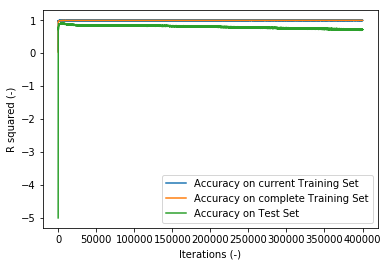

In [19]:
plt.plot( iterations, performance_train_current, label = 'Accuracy on current Training Set' )

plt.plot( iterations, performance_train_complete, label = 'Accuracy on complete Training Set' )

plt.plot( iterations, performance_test, label = 'Accuracy on Test Set' )

plt.legend( loc = 'best' )

plt.xlabel( 'Iterations (-)' )

plt.ylabel( 'R squared (-)' )

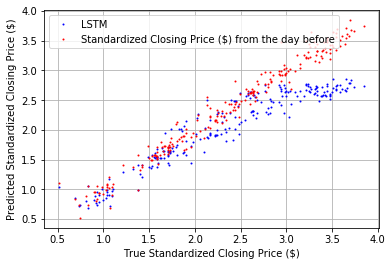

In [20]:
plt.plot( test_y, sess.run( output, feed_dict = { x_tf : test_x } ), 'bo', markersize = 1, label = 'LSTM' )

plt.plot( test_y, test_x[ :, 31, 0 ], 'ro', markersize = 1, label = 'Standardized Closing Price ($) from the day before' )

plt.xlabel( 'True Standardized Closing Price ($)' )

plt.ylabel( 'Predicted Standardized Closing Price ($)' )

plt.legend( loc = 'best' )

plt.grid()

Text(0, 0.5, 'R squared (-)')

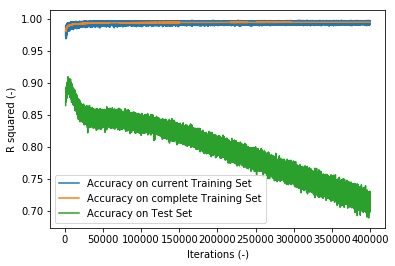

In [21]:
plt.plot( iterations[ 1000 : len( performance_train_current ) ], 
         performance_train_current[ 1000 : len( performance_train_current ) ], label = 'Accuracy on current Training Set' )

plt.plot( iterations[ 1000 : len( performance_train_current ) ],
         performance_train_complete[ 1000 : len( performance_train_current ) ], label = 'Accuracy on complete Training Set' )

plt.plot( iterations[ 1000 : len( performance_train_current ) ],
         performance_test[ 1000 : len( performance_train_current ) ], label = 'Accuracy on Test Set' )

plt.legend( loc = 'best' )

plt.xlabel( 'Iterations (-)' )

plt.ylabel( 'R squared (-)' )

Text(0, 0.5, 'R squared (-)')

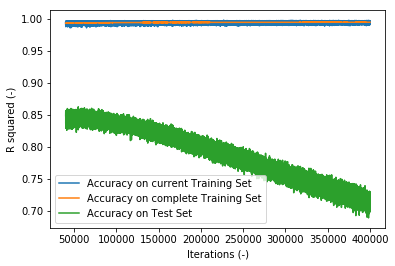

In [22]:
plt.plot( iterations[ 40000 : len( performance_train_current ) ], 
         performance_train_current[ 40000 : len( performance_train_current ) ], label = 'Accuracy on current Training Set' )

plt.plot( iterations[ 40000 : len( performance_train_current ) ],
         performance_train_complete[ 40000 : len( performance_train_current ) ], label = 'Accuracy on complete Training Set' )

plt.plot( iterations[ 40000 : len( performance_train_current ) ],
         performance_test[ 40000 : len( performance_train_current ) ], label = 'Accuracy on Test Set' )

plt.legend( loc = 'best' )

plt.xlabel( 'Iterations (-)' )

plt.ylabel( 'R squared (-)' )

In [23]:
sess.close()

So we learnt, that adding the additional information of the other FAANG stocks does not improve the accuracy of the model. Thus, we end our approach to model the APPLE stock.<br>
Class dismissed.